> # Predict revenue per customer for a Google Merchandise store.
### **What is Revenue:**

It is total revenue in a given time period by the number of users in that time period.

**Revenue: ** **Total Revenue/ Number of Users.**

### Whay to choose specific algorithms? Which algorithms I can use? What are specification of algorithm. List all prediction algorithms. 


In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
from sklearn.metrics import confusion_matrix
# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


### Read train.csv file 


In [52]:

df = pd.read_csv('../input/train.csv') #parse_dates=['date'])

In [53]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


## Data Fields: Column Information

fullVisitorId- A unique identifier for each user of the Google Merchandise Store. <br>
channelGrouping - The channel via which the user came to the Store. <br>
date - The date on which the user visited the Store.<br>
device - The specifications for the device used to access the Store. <br>
geoNetwork - This section contains information about the geography of the user. <br>
sessionId - A unique identifier for this visit to the store.<br>
socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged". <br>
totals - This section contains aggregate values across the session.<br>
trafficSource - This section contains information about the Traffic Source from which the session originated. <br>
visitId - An identifier for this session. <br>
visitNumber - The session number for this user. If this is the first session, then this is set to 1.<br>
visitStartTime - The timestamp (expressed as POSIX time).<br>


### Processing JSON data.
From data description we can see that following columns 'device', 'geoNetwork', 'totals' and 'trafficSource' contains data in JSON format. 
JSON library can parse JSON data into string or files. The library parse data into python dictionary or strings. 


In [54]:
# Create new dataframes from JSON fields

device_df = df.device.apply(json.loads).values.tolist()
device_df = pd.DataFrame.from_records(device_df)

geoNetwork_df = df.geoNetwork.apply(json.loads).values.tolist()
geoNetwork_df = pd.DataFrame.from_records(geoNetwork_df)

totals_df = df.totals.apply(json.loads).values.tolist()
totals_df = pd.DataFrame.from_records(totals_df)

trafficSource_df = df.trafficSource.apply(json.loads).values.tolist()
trafficSource_df = pd.DataFrame.from_records(trafficSource_df)


Drop 'device', 'geoNetwork', 'totals', 'trafficSource' columns from original datset. 
Merge main and parsed dataset. 

In [55]:
df.drop(['device', 'geoNetwork', 'totals', 'trafficSource'], axis=1, inplace=True)
df = pd.concat([df, geoNetwork_df, device_df, totals_df, trafficSource_df], axis=1)

In [56]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution,bounces,hits,newVisits,pageviews,transactionRevenue,visits,adContent,adwordsClickInfo,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,NaN,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,NaN,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,NaN,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,not available in demo dataset,not available in demo dataset,Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,Southeast Asia,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,NaN,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,go

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 50 columns):
channelGrouping              903653 non-null object
date                         903653 non-null int64
fullVisitorId                903653 non-null object
sessionId                    903653 non-null object
socialEngagementType         903653 non-null object
visitId                      903653 non-null int64
visitNumber                  903653 non-null int64
visitStartTime               903653 non-null int64
city                         903653 non-null object
cityId                       903653 non-null object
continent                    903653 non-null object
country                      903653 non-null object
latitude                     903653 non-null object
longitude                    903653 non-null object
metro                        903653 non-null object
networkDomain                903653 non-null object
networkLocation              903653 non-null object
region   

Check for null values acrocss each column and sum the total number of null values. 

In [60]:
df.isnull().sum(axis = 0)
#print(df.dtypes)

channelGrouping                   0
date                              0
fullVisitorId                     0
sessionId                         0
socialEngagementType              0
visitId                           0
visitNumber                       0
visitStartTime                    0
city                              0
cityId                            0
continent                         0
country                           0
latitude                          0
longitude                         0
metro                             0
networkDomain                     0
networkLocation                   0
region                            0
subContinent                      0
browser                           0
browserSize                       0
browserVersion                    0
deviceCategory                    0
flashVersion                      0
isMobile                          0
language                          0
mobileDeviceBranding              0
mobileDeviceInfo            

In [61]:
df.channelGrouping.unique()

array(['Organic Search', 'Referral', 'Paid Search', 'Affiliates',
       'Direct', 'Display', 'Social', '(Other)'], dtype=object)

In [62]:
df.fullVisitorId.unique()

array(['1131660440785968503', '377306020877927890', '3895546263509774583',
       ..., 5123779100307500332, 7231728964973959842, 5744576632396406899],
      dtype=object)

## **geoNetworK**:
It contains logs of Geographical details of users with 10 attributes.
<br>
One: City – Paris, Dubai, Seattle. <br>
Two: City ID – Not available.<br>
Three: Continent –Asia, Europe, America.<br>
Four: Country – USA, India, France.<br>
Five: Latitude – Not Available. <br>
Six: Longitude – Not Available. <br>
Seven: Metro – Chicago IL, Las Vegas NV. <br>
Eight: Network Domain – malnet.ru, lumenis.com <br>
Network Location: Not Available. <br>
Nine: Region – Sindh, Karnataka, Moscow. <br>
Ten: subcontinent: South Asia, North Africa. <br>    


In [63]:
for col in geoNetwork_df:
    print (col,geoNetwork_df[col].unique())

city ['Izmir' 'not available in demo dataset' 'Madrid' 'Brisbane' 'Karachi'
 'Paris' 'Singapore' 'Buenos Aires' '(not set)' 'Bangkok' 'Jakarta'
 'Bengaluru' 'London' 'Amsterdam' 'Moscow' 'Kolkata' 'Seoul' 'Santiago'
 'Warsaw' 'Dublin' 'Mexico City' 'Barcelona' 'Sao Paulo' 'Mountain View'
 'Istanbul' 'Dubai' 'New Delhi' 'Sydney' 'New York' 'Rio de Janeiro'
 'Hyderabad' 'Toronto' 'Washington' 'Los Angeles' 'Pune' 'San Francisco'
 'Seattle' 'Palo Alto' 'Santa Clara' 'Mumbai' 'Colombo' 'Rome' 'Chicago'
 'Nairobi' 'Boston' 'Tel Aviv-Yafo' 'La Victoria' 'Sunnyvale' 'Ann Arbor'
 'San Jose' 'Austin' 'Pittsburgh' 'Montreal' 'Cupertino' 'Salem'
 'Ho Chi Minh City' 'Hanoi' 'Tunis' 'Monterrey' 'Ankara' 'Quezon City'
 'Budapest' 'Minato' 'Dallas' 'Vancouver' 'Kirkland' 'Yokohama'
 'Stockholm' 'Tigard' 'Fremont' 'Boulder' 'Munich' 'Chennai' 'Kiev'
 'Houston' 'Hong Kong' 'Prague' 'Frankfurt' 'Atlanta' 'Ostrava' 'Portland'
 'Hamburg' 'Decin' 'Hradec Kralove' 'Lisbon' 'San Diego' 'Cambridge'
 'Beijing'

latitude ['not available in demo dataset']
longitude ['not available in demo dataset']
metro ['(not set)' 'not available in demo dataset' 'London'
 'San Francisco-Oakland-San Jose CA' 'New York NY'
 'Washington DC (Hagerstown MD)' 'Los Angeles CA' 'Seattle-Tacoma WA'
 'Chicago IL' 'Boston MA-Manchester NH' 'Detroit MI' 'Austin TX'
 'Pittsburgh PA' 'Roanoke-Lynchburg VA' 'Dallas-Ft. Worth TX'
 'Portland OR' 'Denver CO' 'Houston TX' 'Atlanta GA' 'San Diego CA'
 'Phoenix AZ' 'Columbus OH' 'Charlotte NC' 'Jacksonville FL'
 'Meridian (exc. Channel Islands)' 'Midlands' 'Las Vegas NV'
 'La Crosse-Eau Claire WI' 'Springfield-Holyoke MA'
 'Green Bay-Appleton WI' 'San Antonio TX' 'North West'
 'Minneapolis-St. Paul MN' 'Philadelphia PA' 'Indianapolis IN'
 'Chico-Redding CA' 'Orlando-Daytona Beach-Melbourne FL'
 'Norfolk-Portsmouth-Newport News VA' 'Miami-Ft. Lauderdale FL' 'JP_KANTO'
 'Central Scotland' 'Omaha NE' 'Tampa-St. Petersburg (Sarasota) FL'
 'Nashville TN' 'Salt Lake City UT' 'Charlest

## **Device:**
It contains logs of electronic device used by use: Attributes are: <br>
First: Browser – Chrome, Opera Mini.<br>
Second: BrowserSize – Not Available.<br>
Third: BrowserVersion : Not Available.<br>
Forth: DeviceCategory: Desktop, mobile, tablet.<br>
Fifth: FlashVersion: Not Available.<br>
Sixth: IsMobile – False, True.<br>
Seventh: Language – Not Available.<br>
Eighth: mobileDeviceBranding: Not Available.<br>
Ninth: MobileDeviceInfo – Not available.<br>
Tenth: MobileDeviceMarketingName: Not Available<br>
Eleventh : mobileDeviceModel : Not Available <br>
Twelfth: mobileInputSelector : Not Available <br>
Thirteen: operatingSystem – Windows, Linux. <br>
Fourteen: operatingSystemVersion – Not Available <br>
Fifteen: screenColors – Not Available. <br>
Sixteen: screenResolution – Not available. <br>


In [64]:
for col in device_df:
    print (col,device_df[col].unique())

browser ['Chrome' 'Firefox' 'UC Browser' 'Internet Explorer' 'Safari' 'Edge'
 'Opera Mini' 'Opera' 'BlackBerry' 'Safari (in-app)' 'Coc Coc'
 'Mozilla Compatible Agent' 'ADM' 'MRCHROME' 'Amazon Silk' 'YaBrowser'
 'Android Webview' 'Puffin' 'Nokia Browser' 'Maxthon' 'Nintendo Browser'
 'Android Browser' 'Lunascape' 'IE with Chrome Frame' 'ThumbSniper'
 'LYF_LS_4002_12' 'Mozilla' 'osee2unifiedRelease' 'NokiaE52-1' 'Iron'
 '[Use default User-agent string] LIVRENPOCHE' '(not set)'
 'LYF_LS_4002_11' 'M5' 'Android Runtime' 'Apple-iPhone7C2' 'SeaMonkey'
 'Konqueror' 'Seznam' 'Changa 99695759' 'no-ua' 'MQQBrowser' 'Nichrome'
 'HTC802t_TD' 'DASH_JR_3G' 'DoCoMo' 'subjectAgent: NoticiasBoom' 'YE'
 'User Agent' '0' 'Hisense M20-M_LTE' 'Reddit' 'TCL P500M' 'CSM Click']
browserSize ['not available in demo dataset']
browserVersion ['not available in demo dataset']
deviceCategory ['desktop' 'mobile' 'tablet']
flashVersion ['not available in demo dataset']
isMobile [False  True]
language ['not available

In [65]:
for col in totals_df:
    print (col,totals_df[col].unique())

bounces ['1' nan]
hits ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '41' '42' '43' '44' '45'
 '46' '47' '48' '49' '50' '51' '52' '54' '55' '57' '65' '67' '72' '74'
 '79' '82' '83' '92' '103' '109' '134' '143' '144' '66' '73' '112' '189'
 '62' '63' '81' '91' '102' '161' '40' '86' '99' '61' '69' '80' '89' '100'
 '53' '56' '58' '71' '76' '77' '95' '229' '60' '64' '68' '85' '94' '96'
 '107' '110' '113' '147' '331' '108' '59' '70' '98' '119' '303' '218'
 '146' '75' '78' '93' '101' '149' '106' '114' '156' '138' '141' '175' '88'
 '97' '115' '90' '183' '227' '87' '126' '148' '130' '176' '84' '202' '121'
 '122' '207' '140' '193' '302' '142' '105' '116' '196' '111' '201' '133'
 '159' '117' '131' '150' '168' '311' '249' '127' '137' '500' '155' '118'
 '125' '139' '154' '123' '124' '104' '162' '167' '170' '132' '136' '151'
 '166' '187' '279' '328' '174' '38

In [66]:
#for col in trafficSource_df:
 #   print (col,trafficSource_df[col].unique())

In [67]:
trafficSource_df.head()

,adContent,adwordsClickInfo,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source
0,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
2,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
3,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,google + online,organic,NaN,google
4,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,True,(not provided),organic,NaN,google


In [68]:
trafficSource_df['adwordsClickInfo'].head()

0    {'criteriaParameters': 'not available in demo ...
1    {'criteriaParameters': 'not available in demo ...
2    {'criteriaParameters': 'not available in demo ...
3    {'criteriaParameters': 'not available in demo ...
4    {'criteriaParameters': 'not available in demo ...
Name: adwordsClickInfo, dtype: object

In [69]:
#adwordsClickInfo_df = trafficSource_df.adwordsClickInfo.apply(json.loads).values.tolist()
adwordsClickInfo_df = pd.DataFrame.from_records(trafficSource_df['adwordsClickInfo'])
adwordsClickInfo_df.head()

,adNetworkType,criteriaParameters,gclId,isVideoAd,page,slot,targetingCriteria
0,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
1,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
2,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
3,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN
4,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,NaN


## Remove unnecessary columns or colums containing least infomation
We can see that some columns contains no usful  infomation, we are going to drop those columns from main dataset.


In [70]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,city,cityId,continent,country,latitude,longitude,metro,networkDomain,networkLocation,region,subContinent,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution,bounces,hits,newVisits,pageviews,transactionRevenue,visits,adContent,adwordsClickInfo,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,NaN,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,NaN,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,NaN,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,not available in demo dataset,not available in demo dataset,Asia,Indonesia,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,Southeast Asia,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1,1,NaN,1,NaN,{'criteriaParameters': 'not available in demo ...,(not set),NaN,NaN,go

In [71]:
df = df.drop(['latitude','longitude','cityId','networkLocation', 'browserSize','browserVersion',
        'flashVersion','language','mobileDeviceBranding','mobileDeviceInfo','mobileDeviceMarketingName',
        'mobileDeviceModel','mobileInputSelector','operatingSystemVersion','screenColors','screenResolution',
        'adwordsClickInfo'],axis=1)

In [72]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,city,continent,country,metro,networkDomain,region,subContinent,browser,deviceCategory,isMobile,operatingSystem,bounces,hits,newVisits,pageviews,transactionRevenue,visits,adContent,campaign,campaignCode,isTrueDirect,keyword,medium,referralPath,source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,Chrome,desktop,False,Windows,1,1,1,1,NaN,1,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,Firefox,desktop,False,Macintosh,1,1,1,1,NaN,1,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,Chrome,desktop,False,Windows,1,1,1,1,NaN,1,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,UC Browser,desktop,False,Linux,1,1,1,1,NaN,1,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,Chrome,mobile,True,Android,1,1,NaN,1,NaN,1,NaN,(not set),NaN,True,(not provided),organic,NaN,google


## Save sorted dataframe in csv. 

In [78]:
df.to_csv('out.csv', sep=',')

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(12,15))
#sns.set(style="darkgrid")
#ax = sns.countplot(y="browser",hue = "visitNumber", data=df)

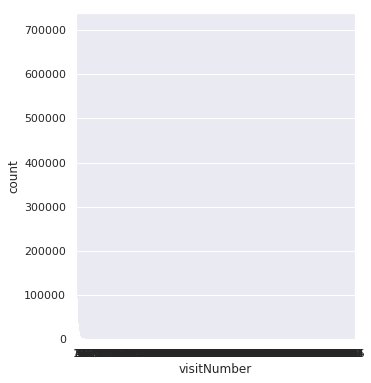

In [80]:
import seaborn as sns
plt.figure(figsize=(5,6))
sns.set(style="darkgrid")
ax = sns.countplot(x="visitNumber", data=df)

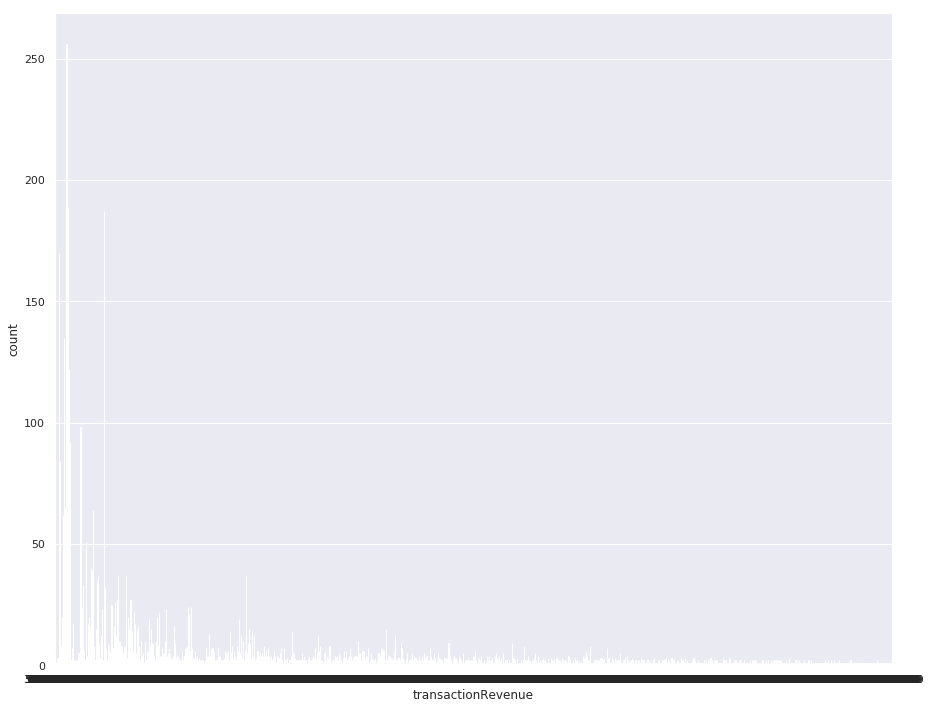

In [81]:
plt.figure(figsize=(15,12))
sns.set(style="darkgrid")
ax = sns.countplot(x="transactionRevenue",data=df)


In [82]:
df['transactionRevenue'].unique()


array([nan, '37860000', '306670000', ..., '335260000', '30750000',
       '69390000'], dtype=object)